Distance between points: 84921.4496901889 meters


NameError: name 'ScaleBar' is not defined

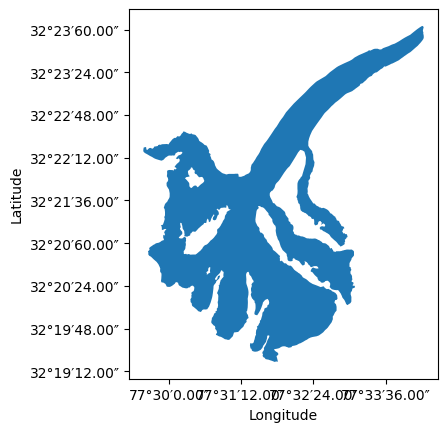

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from shapely.geometry import Point


# Function to convert decimal degrees to DMS string for axis labeling
def decimal_to_dms(deg):
    d = int(deg)
    m = int((deg - d) * 60)
    s = (deg - d - m / 60) * 3600
    return f"{abs(d)}°{abs(m)}′{abs(s):.2f}″"

# Create a GeoSeries with two points, one degree of longitude apart, on the same latitude
points = gpd.GeoSeries(
    [Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326  # WGS 84
)

# Convert to a projected coordinate system for distance calculation
points = points.to_crs(32619)  # UTM Zone 19N

# Calculate the distance between the two points
distance_meters = points[0].distance(points[1])

print(f"Distance between points: {distance_meters} meters")

# Load the shapefile
shapefile = gpd.read_file('C:/Users/imsam/OneDrive/Desktop/ArcGis datasets/Snow Depth Suthri Dhaka')
shapefile = shapefile.to_crs(4326)  # Ensure using geographic WGS 84

# Plot the shapefile
ax = shapefile.plot()

# Customizing the x and y axes to show DMS using the conversion function
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: decimal_to_dms(x)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: decimal_to_dms(y)))

plt.xlabel('Longitude')
plt.ylabel('Latitude')




plt.title('Suthri Dhaka')
plt.show()
